In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
from matplotlib import pyplot as plt
import scipy
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from collections import Counter
from imblearn.combine import SMOTEENN
plt.style.use('default')
import warnings
warnings.filterwarnings("ignore")

In [4]:
#import the dataset
df=pd.read_csv(r"Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#print concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#check for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#check for duplicate records
df[df.duplicated()].shape[0]

0

In [8]:
#check datatype
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
#since customerId is not required for prediction so drop it
df.drop('customerID',axis=1,inplace=True)

In [10]:
#since total changes is having numerical value but dtype is object to change it into numeric
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [11]:
#print last 5 records of the  dataset
df.tail(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


# Exploratory Data Analysis :

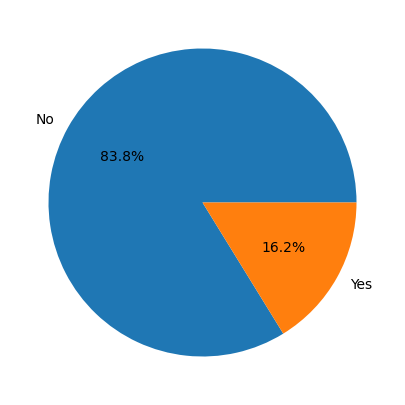

In [12]:
#pie chart to count senior citizen
plt.figure(figsize=(10,5))
plt.pie(df["SeniorCitizen"].value_counts(),autopct="%.1f%%",labels=["No","Yes"])
plt.show()

as we can see 83.8 % of the customers are senior citizen and only 16.2% are adult customer.

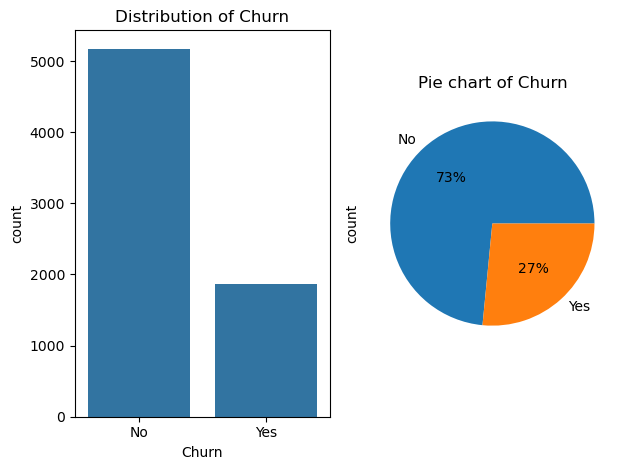

In [13]:
#check the distibution of churn class
plt.subplot(121)
sns.countplot(data=df,x="Churn")
plt.title("Distribution of Churn")
plt.subplot(122)
df['Churn'].value_counts().plot(kind='pie',autopct="%1.f%%",labels=['No','Yes'])
plt.title('Pie chart of Churn')
plt.tight_layout()
plt.show()

In [14]:
#perentage of each class sample distribution
print("Customer Churn : {}%".format(np.round((len(df[df["Churn"]=="Yes"])/len(df)*100),decimals=2)))
print("Customer Not Churn : {}%".format(np.round((len(df[df["Churn"]=="No"])/len(df)*100),decimals=2)))

Customer Churn : 26.54%
Customer Not Churn : 73.46%


Since our dataset is highly imbalance we need to balance before fitting it into model

In [15]:
#how much loss we are having because of customer churn
churn_customers=df[df["Churn"]=="Yes"]
loss=churn_customers["TotalCharges"].sum()
total_revenue=df["TotalCharges"].sum()
print("We have lost arround {}$ due to customer churn".format(loss))
print("We have lost arround {} percentage of revengue due to customer churn".format(np.round(loss/total_revenue*100,decimals=2)))

We have lost arround 2862926.9$ due to customer churn
We have lost arround 17.83 percentage of revengue due to customer churn


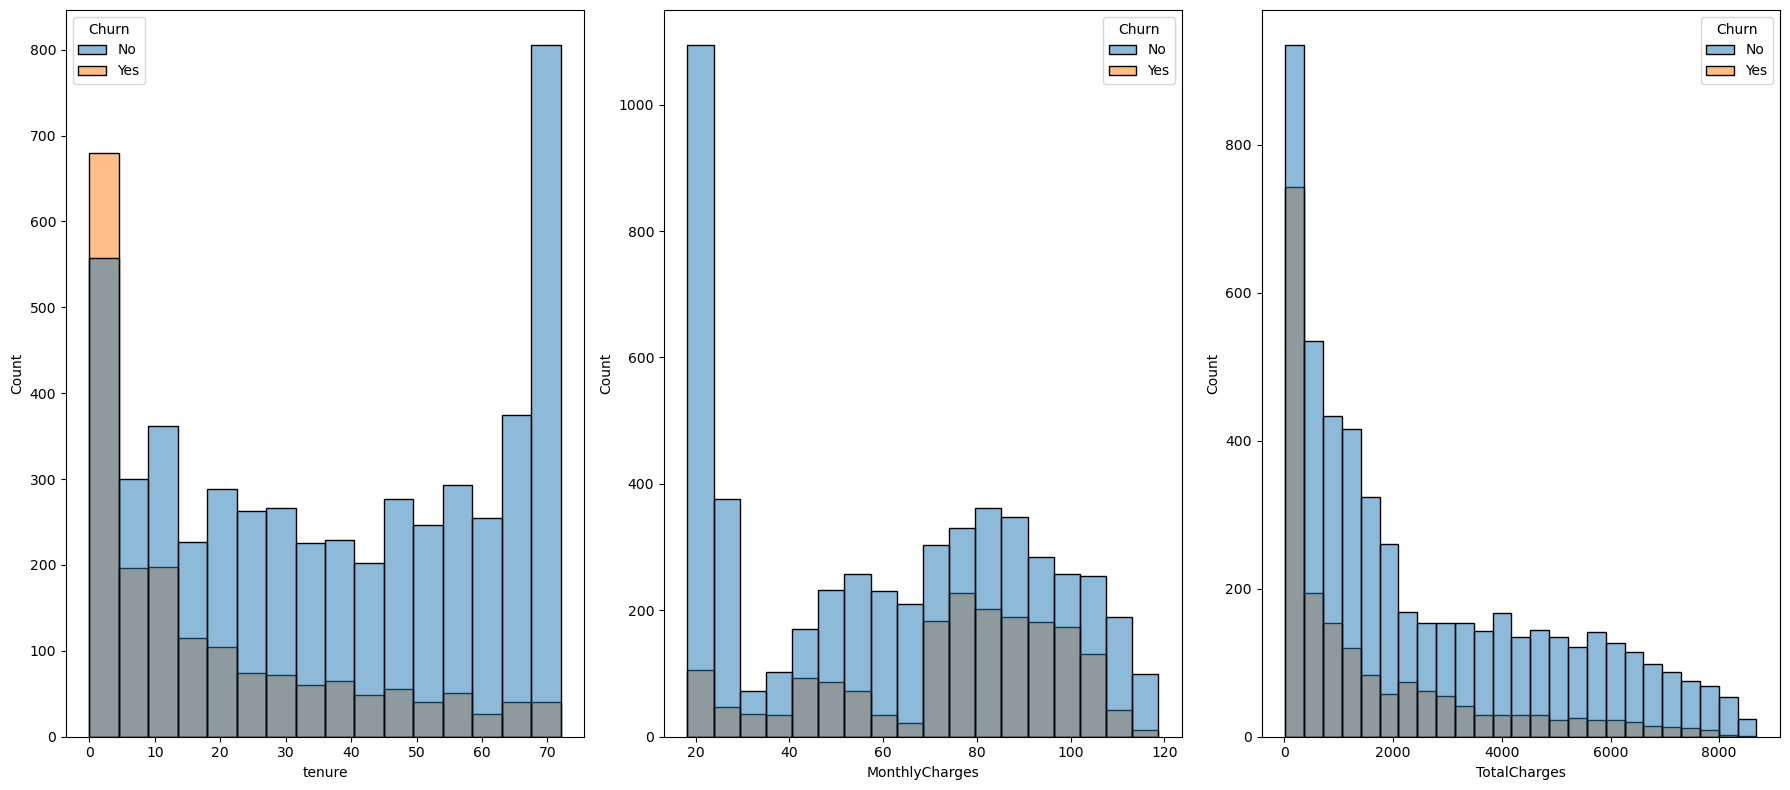

In [16]:
#plot numerical features with histogram
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(18,8))
axes=axs.flatten()
num_columns=['tenure', 'MonthlyCharges', 'TotalCharges']
for i,col in enumerate(num_columns):
  if(col!='SeniorCitizen'):
    sns.histplot(x=col,data=df,hue='Churn',ax=axes[i])
fig.tight_layout()
plt.show()

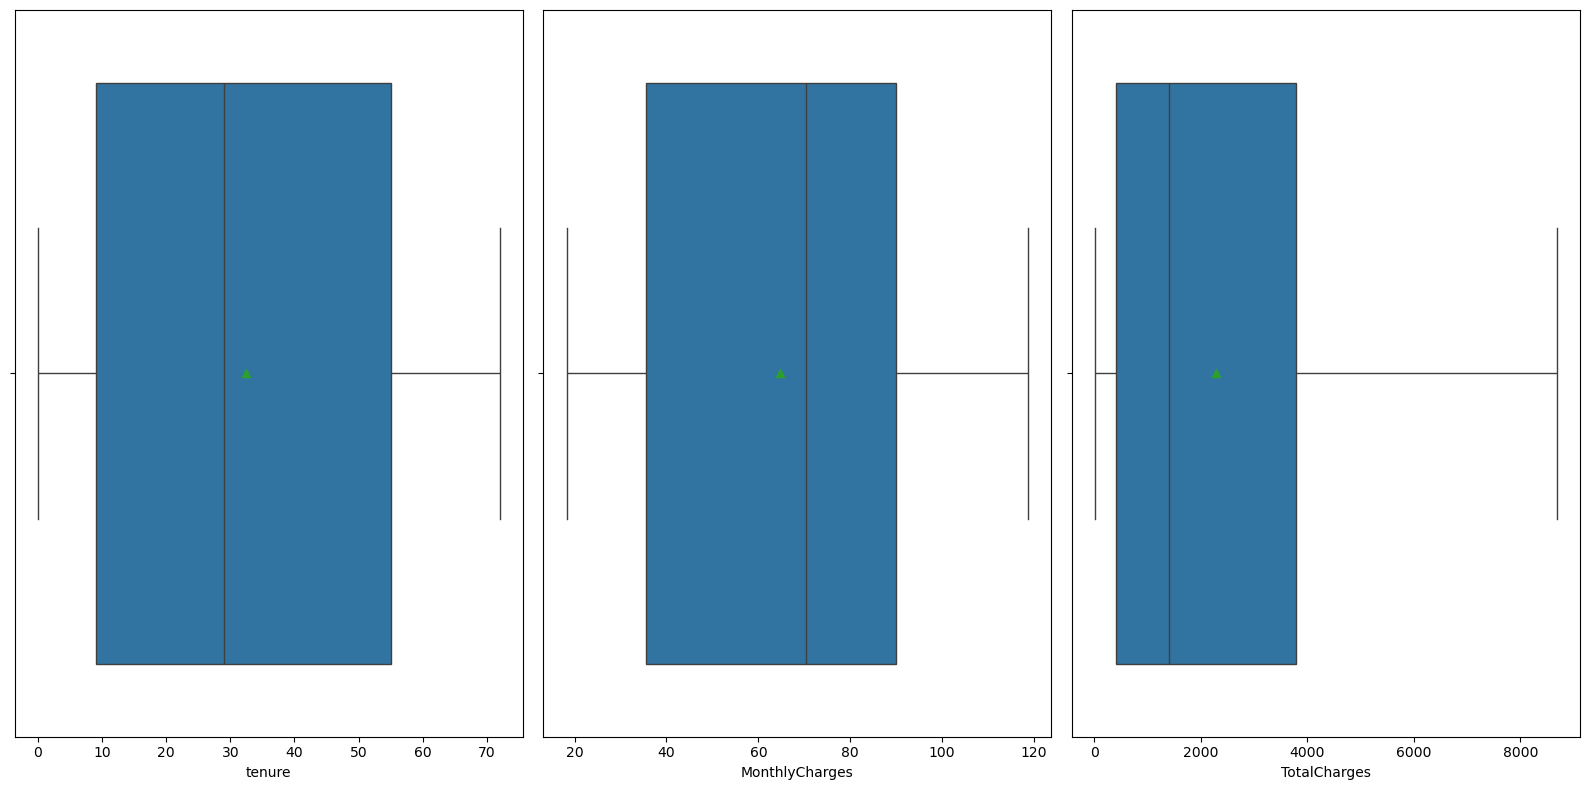

In [17]:
#plot numerical features with boxplot
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(16,8))
axes=axs.flatten()
num_columns=['tenure', 'MonthlyCharges', 'TotalCharges']
for i,col in enumerate(num_columns):
  if(col!='SeniorCitizen'):
    sns.boxplot(x=col,data=df,showmeans=True,ax=axes[i])
fig.tight_layout()
plt.show()

after plotting histogram and boxplot we found that there is no outlier present in numeric dataset so we don't need to do any kind of outlier treatment.

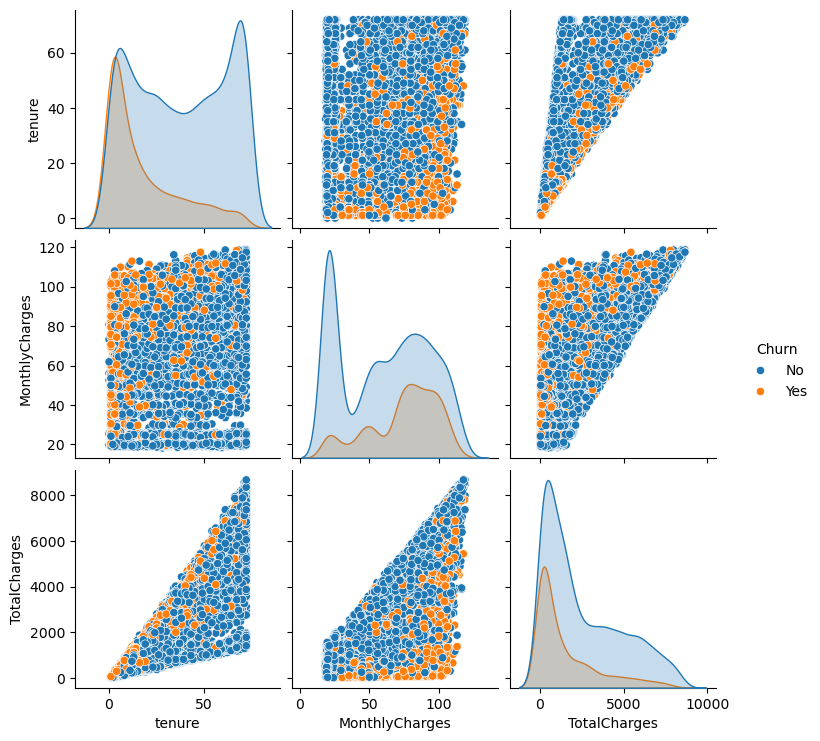

In [18]:
sns.pairplot(df.drop(columns="SeniorCitizen"),hue="Churn",kind="scatter")
plt.show()

# Univariate Analysis

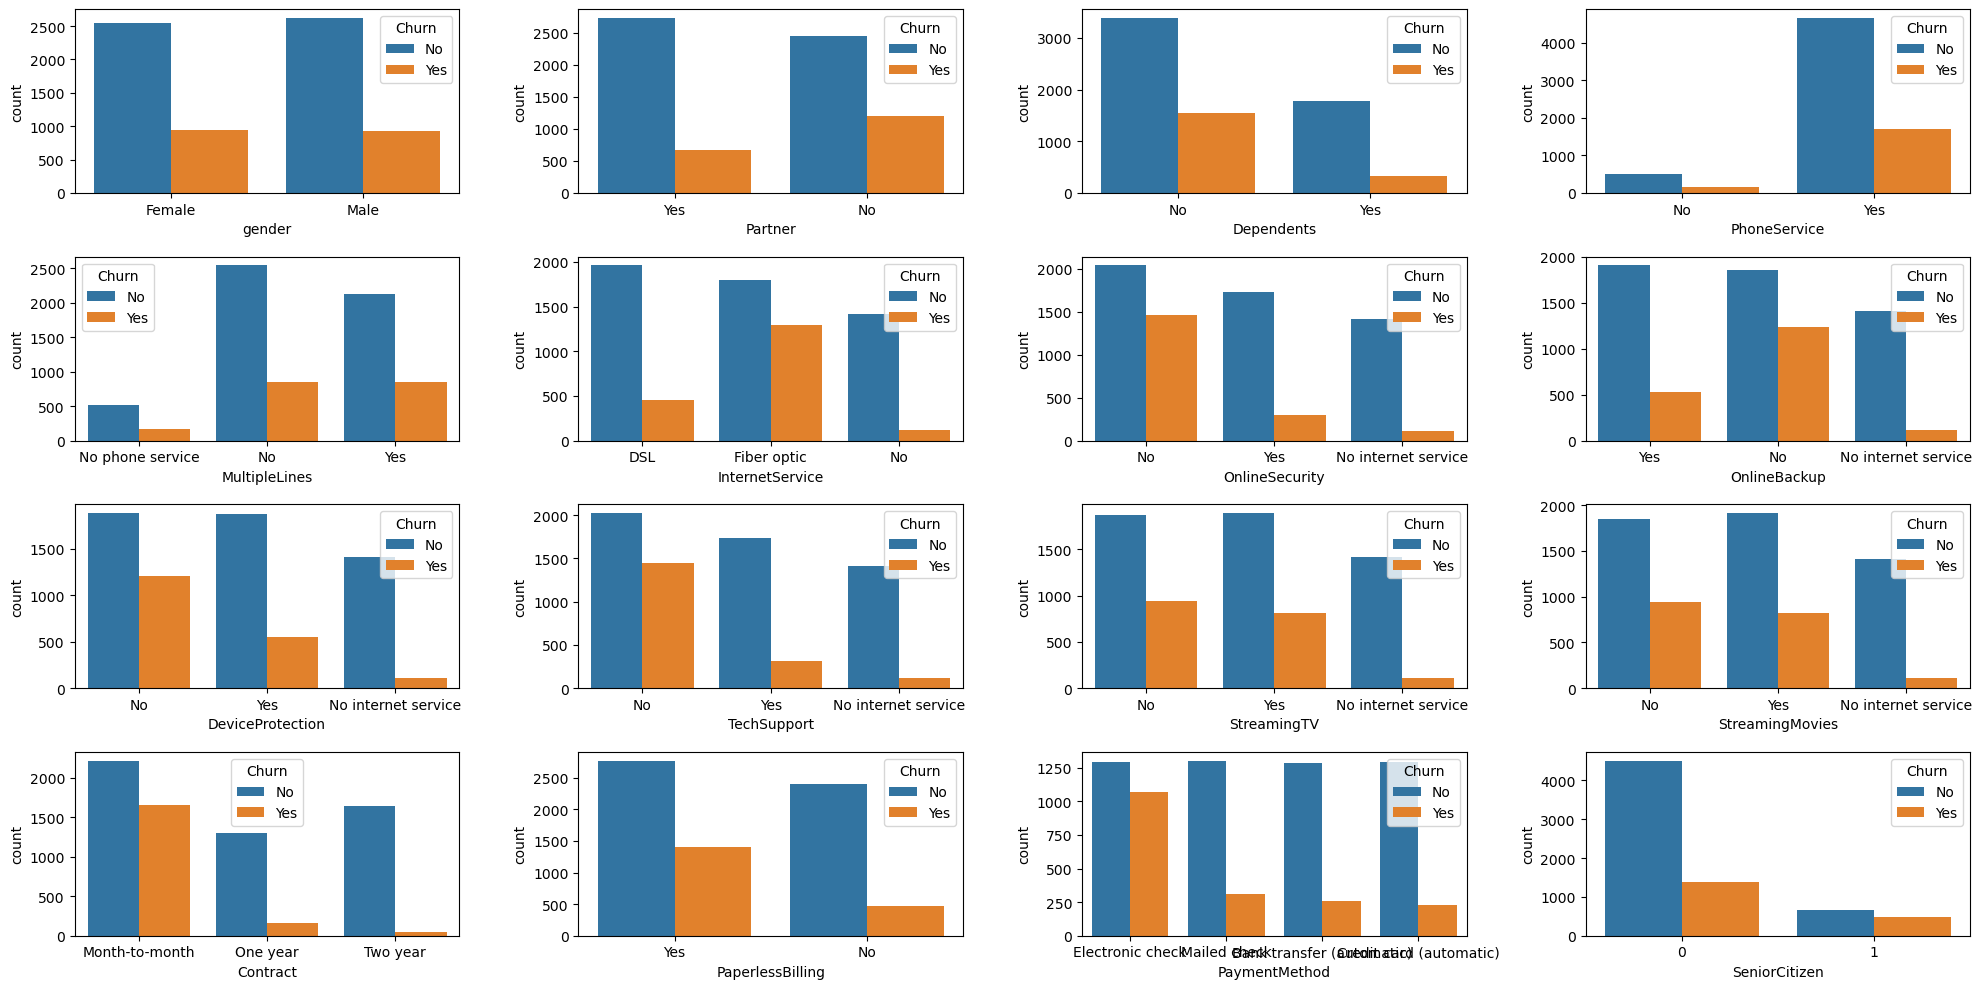

In [19]:
#plot cateogrical features :
cat_features=list(df.select_dtypes(include='object').columns)
cat_features.remove('Churn')
cat_features.append('SeniorCitizen')

fig,axs=plt.subplots(nrows=4,ncols=4,figsize=(20,10))
axes=axs.flatten()
for i,col in enumerate(cat_features):
    sns.countplot(x=col,hue="Churn",data=df,ax=axes[i])
#adjust spacing between subplots
fig.tight_layout()
plt.show()

# Data Cleaning

In [20]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
#check for null values
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [22]:
df["TotalCharges"].fillna(df["TotalCharges"].mean(),inplace=True)

In [23]:
df.isnull().sum().sum()

0

In [24]:
#encoding categorical values into numeric using label encoder
encoder=LabelEncoder()
for feature in df.select_dtypes(include='object').columns:
    df[feature]=encoder.fit_transform(df[feature])

In [25]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [26]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

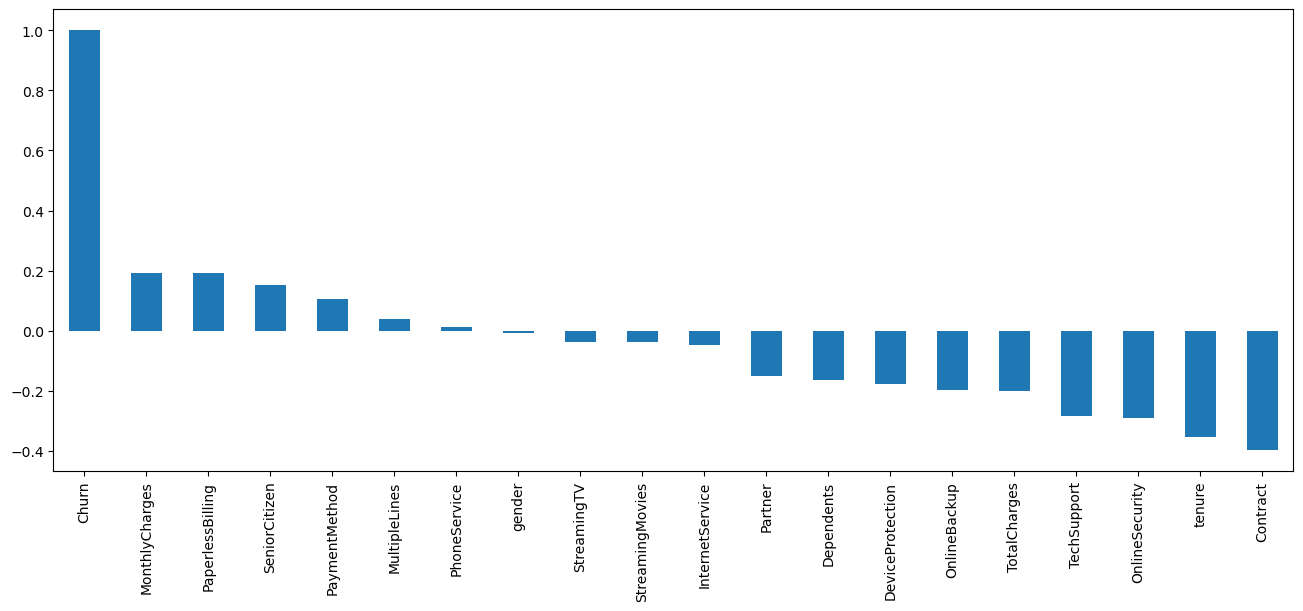

In [27]:
#get correlation of churn with other variables
plt.figure(figsize=(16,6))
df.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")
plt.show()

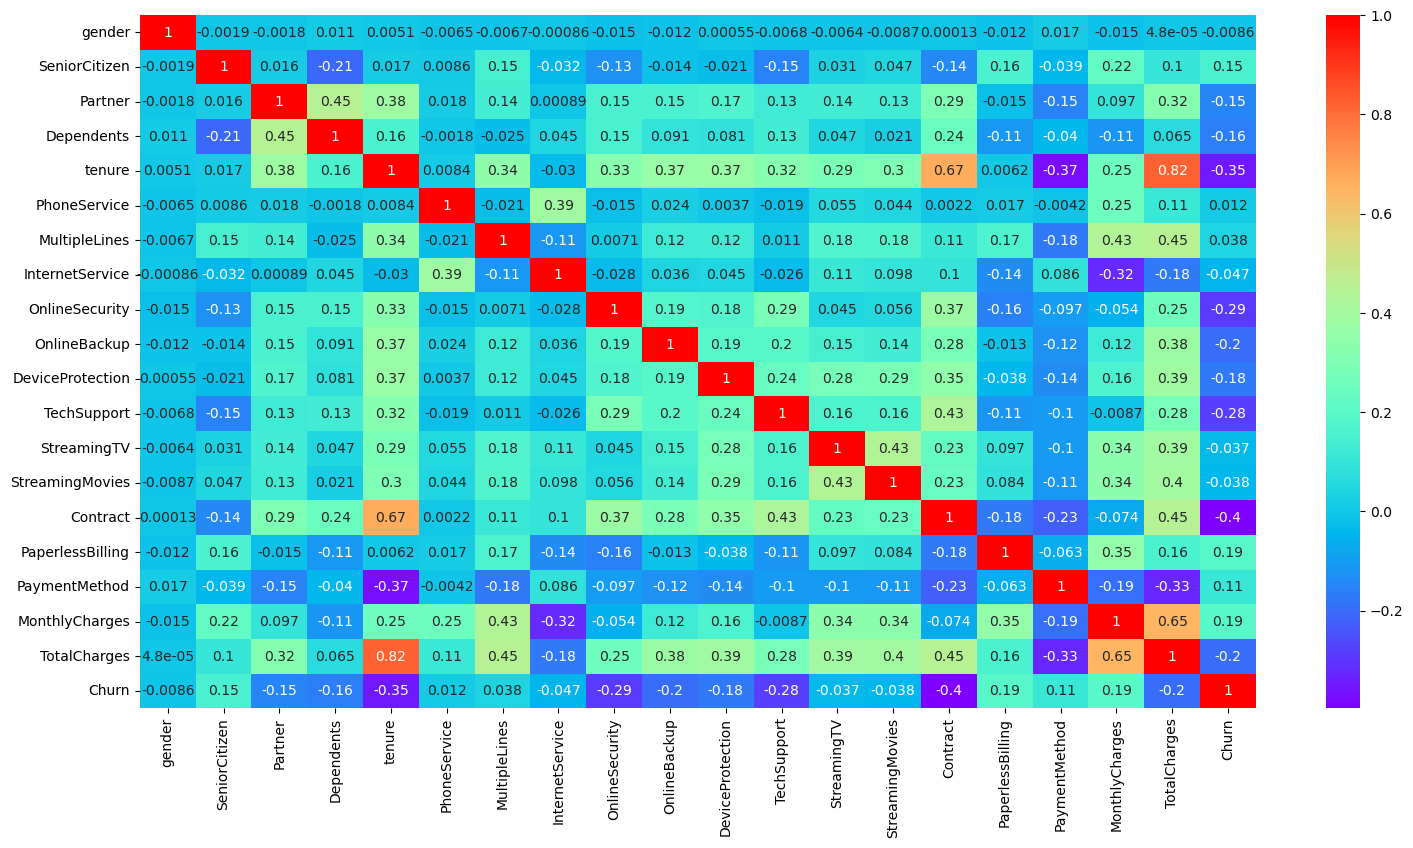

In [28]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(),annot=True,cmap="rainbow")
plt.show()

since we are using ensemble methods for model building so there is no need of feature scaling as its prediction is based on creating multiple decision tree

In [29]:
#seperating independent variables and target variable
x=df.drop("Churn",axis=1)
y=df["Churn"]

In [30]:
x.shape

(7043, 19)

# Feature Selection
selecting only 10 features which has higher correlation with churn

In [31]:
select_feature=SelectKBest(k=10) #no of features to be select
select_feature.fit(x,y)

SelectKBest()

In [32]:
#Top 10 high correlated features
select_feature.get_feature_names_out()

array(['Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges'], dtype=object)

In [33]:
x=x[select_feature.get_feature_names_out()]

In [34]:
x.shape

(7043, 10)

according to the feature selection we have selected 10 top features out of 19 features

split data into training and validation set in 80:20 ratio

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((5634, 10), (5634,), (1409, 10), (1409,))

In [37]:
#its imbalance dataset
y.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [38]:
def evaluate_model_performance(model,test_data):
    prediction=model.predict(test_data)
    #print("Training Accurary : ",model.score(x_train,y_train))
    print("Validation Accurary : {:.2f} %".format(accuracy_score(y_test,prediction)))
    print("Precision Score : {:.2f} %".format(precision_score(y_test,prediction)))
    print("Recall Score : {:.2f} %".format(recall_score(y_test,prediction)))
    print("F1 Score : {:.2f} %".format(f1_score(y_test,prediction)))
    print(classification_report(y_test,prediction))

In [39]:
#Random Forest Model without balancing dataset and without hyper paramter tuning
rand_forest=RandomForestClassifier()
rand_forest.fit(x_train,y_train)

RandomForestClassifier()

In [40]:
#measure the performance of random forest model
evaluate_model_performance(rand_forest,x_test)

Validation Accurary : 0.79 %
Precision Score : 0.63 %
Recall Score : 0.47 %
F1 Score : 0.54 %
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1036
           1       0.63      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [41]:
#GradientBoostingClassifier without balancing dataset and without hyper paramter tuning
gbc_model=GradientBoostingClassifier( )
gbc_model.fit(x_train,y_train)

GradientBoostingClassifier()

In [42]:
#measure the performance of GradientBoostingClassifier
evaluate_model_performance(gbc_model,x_test)

Validation Accurary : 0.81 %
Precision Score : 0.67 %
Recall Score : 0.53 %
F1 Score : 0.59 %
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.67      0.53      0.59       373

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



as we can see our model is not performing up to the mark because of imbalance nature of dataset so we will balance it to reduce TN,FN and increase TP,FP

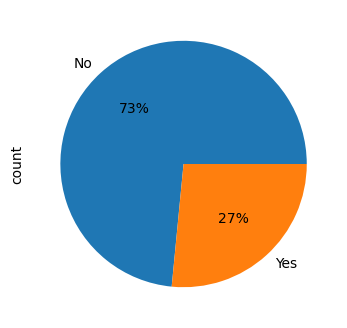

In [43]:
plt.figure(figsize=(8,4))
y.value_counts().plot(kind="pie",autopct="%1.f%%",labels=['No','Yes'])
plt.show()

we have 2 classes class 0 and class 1.
class 0 - majority class
class 1 -minority class

In [44]:
smote=SMOTEENN()
x_st,y_st=smote.fit_resample(x,y)

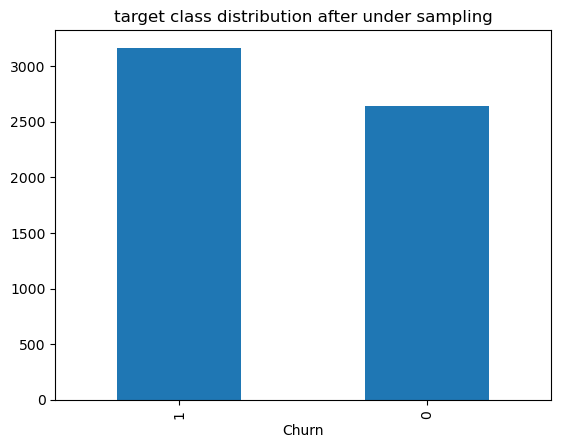

In [45]:
y_st.value_counts().plot(kind="bar")
plt.title("target class distribution after under sampling")
plt.show()

In [46]:
y_st.value_counts()

Churn
1    3163
0    2638
Name: count, dtype: int64

since we have performed SMOTEENN (combination of Smote + ENN) sampling method and we can see our dataset is nearly balanced

In [47]:
#now split training and validation set using balanced dataset
x_train,x_test,y_train,y_test=train_test_split(x_st,y_st,test_size=0.2,random_state=42)

In [48]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((4640, 10), (4640,), (1161, 10), (1161,))

Building Model with Balanced Dataset and performance hyper parameter tuning using RandomSearchCV

In [49]:
param_grid={'n_estimators':[40,80,120,160,200],
            'max_depth':[2,4,6,8,10],
            "criterion":['gini'],
            "random_state":[27,42,43]
            }
random_search_cv=RandomizedSearchCV( estimator=RandomForestClassifier(), param_distributions=param_grid,n_iter=12,cv=5,scoring='f1',verbose=1)
random_search_cv.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=12,
                   param_distributions={'criterion': ['gini'],
                                        'max_depth': [2, 4, 6, 8, 10],
                                        'n_estimators': [40, 80, 120, 160, 200],
                                        'random_state': [27, 42, 43]},
                   scoring='f1', verbose=1)

In [50]:
random_search_cv.best_params_

{'random_state': 43, 'n_estimators': 200, 'max_depth': 10, 'criterion': 'gini'}

In [51]:
#Get final model with best param from RandomizedSearchCV
rf_final_model=random_search_cv.best_estimator_

In [52]:
#evaluate Random Forest Classifier
evaluate_model_performance(rf_final_model,x_test)

Validation Accurary : 0.95 %
Precision Score : 0.94 %
Recall Score : 0.96 %
F1 Score : 0.95 %
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       539
           1       0.94      0.96      0.95       622

    accuracy                           0.95      1161
   macro avg       0.95      0.95      0.95      1161
weighted avg       0.95      0.95      0.95      1161



In [53]:
param_grid2 = {'n_estimators':[100, 150, 200, 250, 300],
             'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'],
              'max_depth': [2,4,6,8],
              'learning_rate': [0.001, 0.01, 0.1, 0.2],
              'loss': ['deviance', 'exponential']
              }

In [54]:
random_search_cv2=RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=42) , param_distributions=param_grid2,n_iter=12,verbose=1,scoring='f1')
random_search_cv2.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=12,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error', 'mse',
                                                      'mae'],
                                        'learning_rate': [0.001, 0.01, 0.1,
                                                          0.2],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [2, 4, 6, 8],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300]},
                   scoring='f1', verbose=1)

In [55]:
random_search_cv2.best_params_

{'n_estimators': 100,
 'max_depth': 8,
 'loss': 'exponential',
 'learning_rate': 0.001,
 'criterion': 'friedman_mse'}

In [56]:
gb_final_model=random_search_cv2.best_estimator_

In [57]:
#evaluate final GradientBoostingClassifier Performance
evaluate_model_performance(gb_final_model,x_test)

Validation Accurary : 0.89 %
Precision Score : 0.84 %
Recall Score : 0.98 %
F1 Score : 0.91 %
              precision    recall  f1-score   support

           0       0.97      0.79      0.87       539
           1       0.84      0.98      0.91       622

    accuracy                           0.89      1161
   macro avg       0.91      0.89      0.89      1161
weighted avg       0.90      0.89      0.89      1161



Save Final Model Integration with application

In [58]:
file=open("trained_model.pkl","wb")
pickle.dump(gb_final_model,file)
file.close()

Conclusion : after balancing the dataset using smootenn and hyper paramter tuning model performance has increase and the highest f1 score we are getting is 97%.